## Import Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dataset/mallCustomers.csv")

df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Visualization on orginal data frame

In [5]:
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

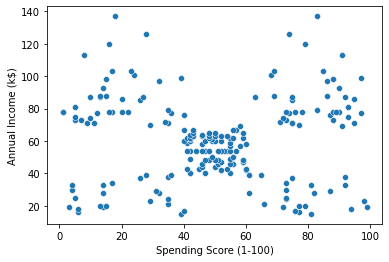

In [6]:
sns.scatterplot(data=df, x="Spending Score (1-100)", y="Annual Income (k$)")

## Selected Data

In [7]:
selected_df = df[["Annual Income (k$)", "Spending Score (1-100)"]]

selected_df.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


# <center>|-----> K Means <-----|</center>

### Finding Elbow Method 

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

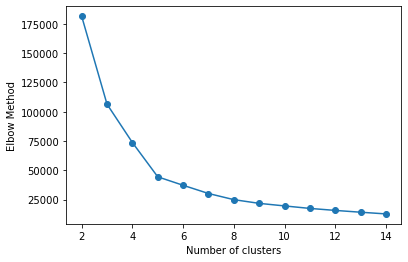

In [9]:
clusters_range = [x for x in range(2, 15)]
inertias = []

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, n_init=100, random_state=0).fit(selected_df)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.plot(clusters_range, inertias, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Elbow Method")
plt.show()

### Finding Silhouette value

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score

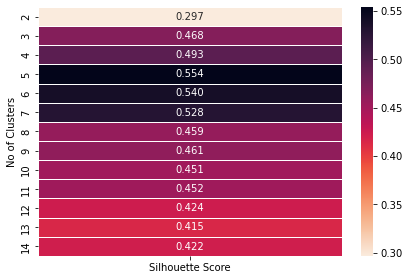

In [11]:
clusters_range = [x for x in range(2, 15)]
result = []

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, n_init=300, random_state=0).fit_predict(selected_df)
    silhouette_avg = silhouette_score(selected_df, kmeans)
    
    result.append([c, silhouette_avg])
    
result = pd.DataFrame(result, columns = ["No of Clusters", "Silhouette Score"])
pivot_km = pd.pivot_table(result, index="No of Clusters", values="Silhouette Score")

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt=".3f", cmap=sns.cm.rocket_r)
plt.tight_layout()

### Finding DB Index (Davies-Bouldin Index)

In [12]:
from sklearn.metrics import davies_bouldin_score

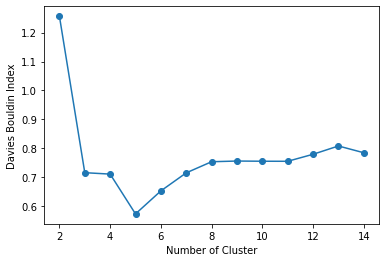

In [13]:
clusters_range = [x for x in range(2, 15)]
result = []

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, n_init=300, random_state=0).fit_predict(selected_df)
    dbIndex = davies_bouldin_score(selected_df, kmeans)
    
    result.append(dbIndex)
    
plt.plot(clusters_range, result, marker='o')
plt.xlabel("Number of Cluster")
plt.ylabel("Davies Bouldin Index")
plt.show()

### Finding Dunn Index

In [14]:
from jqmcvi import base # Used for Dunn index

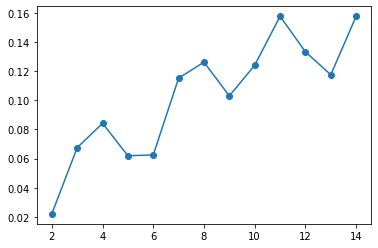

In [15]:
clusters_range = [x for x in range(2, 15)]
result = []

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, n_init=300, random_state=0).fit_predict(selected_df)
    
    pred = pd.DataFrame(kmeans)
    pred.columns = ["Pred"]
    
    prediction = pd.concat([selected_df, pred], axis=1)
    
    lol = [*(prediction.loc[prediction.Pred == x].values for x in range(0, c))]
        
    result.append(base.dunn(lol))
    
plt.plot(clusters_range, result, marker='o')
#plt.xlabel("Number of Cluster ")
#plt.ylabel("Dunn Index")
plt.show()

Since you check a optimize value of Kmeans model in different method (i.e., Elbow Method, Silhouette Score, Dunn Index and DB Index), the result is 6 means number of clusters.

In [16]:
kmeans_result = KMeans(n_clusters=5, n_init=300, random_state=1).fit(selected_df)
labels = pd.DataFrame(kmeans_result.labels_)

clustered_df = selected_df.assign(Cluster=labels)
clustered_df

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

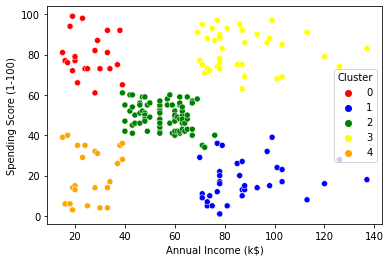

In [17]:
sns.scatterplot(data=clustered_df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette=['red', 'blue', 'green', 'yellow', 'orange'])

In [24]:
kmeans_result.cluster_centers_[0]

array([25.72727273, 79.36363636])

In [31]:
[x[0] for x in kmeans_result.cluster_centers_]

[25.727272727272755,
 88.20000000000002,
 55.29629629629632,
 86.53846153846155,
 26.304347826086982]

In [35]:
lol = {
    'Annual Income (k$)': [x[0] for x in kmeans_result.cluster_centers_],
    'Spending Score (1-100)': [x[1] for x in kmeans_result.cluster_centers_],
    'Cluster': [-1] * len(kmeans_result.cluster_centers_)
}

lol = pd.DataFrame(lol)
lol

,Annual Income (k$),Spending Score (1-100),Cluster
0,25.727273,79.363636,-1
1,88.200000,17.114286,-1
2,55.296296,49.518519,-1
3,86.538462,82.128205,-1
4,26.304348,20.913043,-1


In [36]:
clustered_df = pd.concat([clustered_df, lol], ignore_index=True)

clustered_df

,Annual Income (k$),Spending Score (1-100),Cluster
0,15.000000,39.000000,4
1,15.000000,81.000000,0
2,16.000000,6.000000,4
3,16.000000,77.000000,0
4,17.000000,40.000000,4
...,...,...,...
200,25.727273,79.363636,-1
201,88.200000,17.114286,-1
202,55.296296,49.518519,-1
203,86.538462,82.128205,-1


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

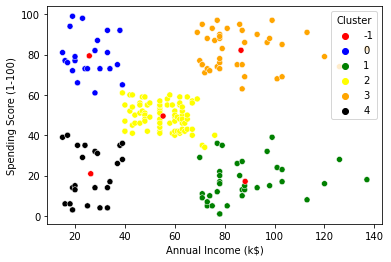

In [37]:
sns.scatterplot(data=clustered_df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette=['red', 'blue', 'green', 'yellow', 'orange', 'black'])

# <center>|-----> DBSCAN <-----|</center>

Since number of cluster contains 5 in KMeans cluster, therefore it belong to min_samples parameter of DBSCAN

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

0.1 :  {0, 1, 2, 3, -1}
0.1 ,  -0.270834542297417 ,  {0, 1, 2, 3, -1}

0.2 :  {0, 1, 2, 3, 4, 5, 6, -1}
0.2 ,  0.13990497615037006 ,  {0, 1, 2, 3, 4, 5, 6, -1}

0.30000000000000004 :  {0, 1, 2, 3, 4, 5, 6, -1}
0.30000000000000004 ,  0.31595469080938154 ,  {0, 1, 2, 3, 4, 5, 6, -1}

0.4 :  {0, 1, 2, 3, -1}
0.4 ,  0.4126986177259228 ,  {0, 1, 2, 3, -1}

0.5 :  {0, 1, -1}
0.5 ,  0.35070898426844344 ,  {0, 1, -1}

0.6 :  {0, -1}
0.6 ,  0.42369367451167633 ,  {0, -1}

0.7000000000000001 :  {0}


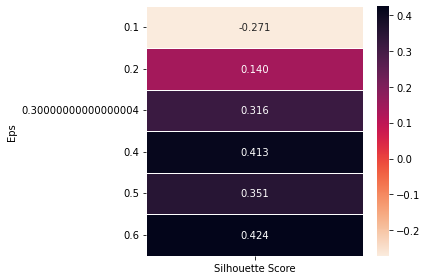

In [39]:
clusters_range = list(np.arange(0.1,1, 0.1))
result = []

float_selected_df = selected_df.astype("float32")
float_selected_df = StandardScaler().fit_transform(float_selected_df)

for c in clusters_range:
    dbscan = DBSCAN(eps=c, min_samples=5).fit(float_selected_df)
    
    core_sample_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_sample_mask[dbscan.core_sample_indices_] = True
    
    labels = dbscan.labels_
    print(c, ": " , set(labels))
    if(len(set(labels)) == 1):
        break
    
    silhouette_avg = silhouette_score(selected_df, labels)
    
    print(c, ", ", silhouette_avg, ", ", set(labels))
    print("")
    
    result.append([c, silhouette_avg])
    
result = pd.DataFrame(result, columns = ["Eps", "Silhouette Score"])
pivot_km = pd.pivot_table(result, index="Eps", values="Silhouette Score")

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt=".3f", cmap=sns.cm.rocket_r)
plt.tight_layout()

Since 0.6 is highest Silhouette Score but it contains only 1 set along with -1. Therefore, check second highest contains 0.4, worth totally 4 sets along with -1. Therefore, selected eps = 0.4

#### Compute DBSCAN


In [40]:
db = DBSCAN(eps=0.4, min_samples=5).fit(float_selected_df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

selected_df['Clus_db'] = db.labels_

realClusterNum = len(set(db.labels_)) - (1 if -1 in labels else 0)
clusterNum = len(set(db.labels_))

/tmp/ipykernel_5257/1842285519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Clus_db'] = db.labels_


### A sample of clusters

In [41]:
print(selected_df.head(7))
print("Number of labels: ", set(db.labels_))

   Annual Income (k$)  Spending Score (1-100)  Clus_db
0                  15                      39        0
1                  15                      81        0
2                  16                       6        1
3                  16                      77        0
4                  17                      40        0
5                  17                      76        0
6                  18                       6        1
Number of labels:  {0, 1, 2, 3, -1}


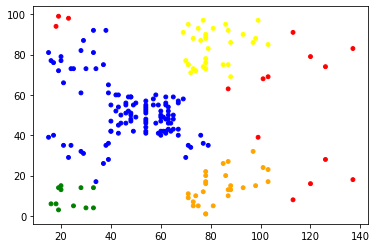

In [42]:
from matplotlib.colors import ListedColormap

plt.figure()
plt.scatter(
    selected_df['Annual Income (k$)'], selected_df['Spending Score (1-100)'], c=selected_df['Clus_db'], cmap=ListedColormap(['red', 'blue', 'green', 'yellow', 'orange']), s=15
)
plt.show()

In [43]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(selected_df[["Annual Income (k$)", "Spending Score (1-100)"]])
distances, indices = nbrs.kneighbors(selected_df[["Annual Income (k$)", "Spending Score (1-100)"]])

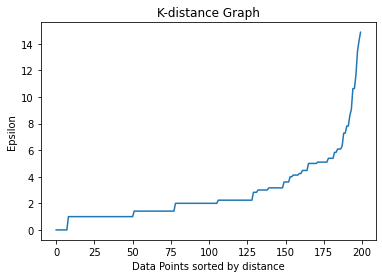

In [44]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure()
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

Result is 6 in epsilon

In [45]:
db = DBSCAN(eps=10, min_samples=5).fit(selected_df[["Annual Income (k$)", "Spending Score (1-100)"]])

print(set(db.labels_))

{0, 1, 2, 3, -1}


In [46]:
selected_df['Clus_db2'] = db.labels_

selected_df.head(8)

/tmp/ipykernel_5257/3237731279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Clus_db2'] = db.labels_


,Annual Income (k$),Spending Score (1-100),Clus_db,Clus_db2
0,15,39,0,0
1,15,81,0,0
2,16,6,1,1
3,16,77,0,0
4,17,40,0,0
5,17,76,0,0
6,18,6,1,1
7,18,94,-1,-1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


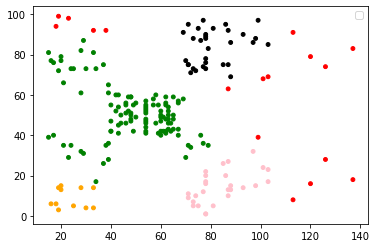

In [47]:
from matplotlib.colors import ListedColormap

plt.figure()
plt.scatter(
    selected_df['Annual Income (k$)'], selected_df['Spending Score (1-100)'], c=selected_df['Clus_db2'], cmap=ListedColormap(['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'black', 'pink']), s=15
)
plt.legend()
plt.show()

# <center>|-----> Fuzzy C Means <-----|</center>

In [48]:
selected_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

selected_df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [49]:
from sklearn.model_selection import train_test_split
from fcmeans import FCM

In [50]:
xTrain, xTest = train_test_split(selected_df[['Annual Income (k$)', 'Spending Score (1-100)']].values)

In [54]:
fcm = FCM(n_clusters=5)
fcm.fit(selected_df[['Annual Income (k$)', 'Spending Score (1-100)']].values)

In [55]:
label = fcm.predict(selected_df[['Annual Income (k$)', 'Spending Score (1-100)']].values)

In [56]:
label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [62]:
lolClustered = selected_df[['Annual Income (k$)', 'Spending Score (1-100)']]
lolClustered['Cluster'] = label

lolClustered

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,0
196,126,28,1
197,126,74,0
198,137,18,1


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

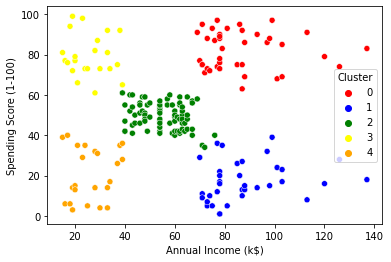

In [64]:
sns.scatterplot(data=lolClustered, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette=['red', 'blue', 'green', 'yellow', 'orange'])